# Background

The data given is about the mock census of an imaginary modest town, held by the United Kingdom conducted in 2021. The purpose of this census is to compare different people across the nation and to provide the government with accurate statistics of the population to enable better planning, to develop policies, and to allocate certain funding.

# Components

- House Number : the detailed number of the respondent's house
- Street : the name of the street where the respondent lives
- First Name : respondent's first name
- Surname : respondent's last name
- Age : respondent's age
- Relationship to Head of House : respondent's relationship to head of the house
- Marital Status : respondent's marital status
- Gender : respondent's gender
- Occupation : respondent's occupation
- Infirmity : respondent's infirmity
- Religion : respondent's religion

# Domain Knowledge

The town from the census is a modestly sized one sandwiched between two much larger cities that it is connected to by motorways. The town does not have a university, but students do live in the town and commute to the nearby cities.

# Task


#### What should be built on an unoccupied plot of land that the local government wishes to develop? Your choices are: 

(i) High-density housing. This should be built if the population is significantly expanding.

(ii) Low-density housing. This should be built if the population is “affluent” and there is demand for large family housing.

(iii) Train station. There are potentially a lot of commuters in the town and building a train station could take pressure off the roads. But how will you identify commuters?

(iv) Religious building. There is already one place of worship for Catholics in the town. Is there demand for a second Church (if so, which denomination?), or for a different religious building?

(v) Emergency medical building. Not a full hospital, but a minor injuries centre. This should be built if there are many injuries or future pregnancies likely in the population.

(vi) Something else?




#### Which one of the following options should be invested in?

(i) Employment and training. If there is evidence for a lot of unemployment, we should re-train people for new skills.

(ii) Old age care. If there is evidence for increasing numbers of retired people in future years, the town will need to allocate more funding for end of life care.

(iii) Increase spending for schooling. If there is evidence of a growing population of school-aged children (new births, or families moving in to the town), then schooling spend should increase.

(iv) General infrastructure. If the town is expanding, then services (waste collection; road maintenance, etc.) will require more investment.

In [1]:
## Import all the libraries that we want to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as st

In [2]:
df = pd.read_csv("census14.csv") ## Read the csv file

In [3]:
df.head() ## Show the top 5

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Davies Trafficway,Paula,Houghton,42,Head,Divorced,Female,Analytical chemist,None,Catholic
1,2,Davies Trafficway,Ashleigh,Smith,42,Head,Single,Female,Unemployed,None,None
2,3,Davies Trafficway,Douglas,Gibson,74,Head,Widowed,Male,"Retired Designer, graphic",None,Catholic
3,4,Davies Trafficway,Carly,Johnson,26,Head,Single,Female,Unemployed,None,None
4,5,Davies Trafficway,Lauren,Jenkins,32,Head,Divorced,Female,General practice doctor,None,Muslim


In [4]:
df.tail() ## Show the bottom 5

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8291,1,Aries Cottage,Hollie,Morris,47,Head,Married,Female,Plant breeder/geneticist,None,Catholic
8292,1,Aries Cottage,Graeme,Morris,51,Husband,Married,Male,Energy engineer,None,Catholic
8293,1,Aries Cottage,Terence,Morris,13,Son,NaN,Male,Student,None,NaN
8294,1,Aries Cottage,Kenneth,Morris,10,Son,NaN,Male,Student,None,NaN
8295,1,Aries Cottage,Brandon,Morris,6,Son,NaN,Male,Student,None,NaN


In [5]:
df.info() ## Show all the data types from each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8296 non-null   int64 
 1   Street                         8296 non-null   object
 2   First Name                     8296 non-null   object
 3   Surname                        8296 non-null   object
 4   Age                            8296 non-null   object
 5   Relationship to Head of House  8296 non-null   object
 6   Marital Status                 6427 non-null   object
 7   Gender                         8296 non-null   object
 8   Occupation                     8296 non-null   object
 9   Infirmity                      8296 non-null   object
 10  Religion                       6383 non-null   object
dtypes: int64(1), object(10)
memory usage: 713.1+ KB


# Data Wrangling and Data Cleaning

`First Name`

In [6]:
df[df['First Name'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7410,28,Grace Lane,,Williams,33,Head,Married,Male,Games developer,None,Methodist


`Surname`

In [7]:
df['Surname'].unique()

array(['Houghton', 'Smith', 'Gibson', 'Johnson', 'Jenkins', 'Harvey',
       'James', 'Lambert', 'Newton', 'Moore', 'Jennings', 'Edwards-Moore',
       'Howard', 'Gibbs', 'Jones', 'Lowe', 'Young', 'Lee', 'Edwards',
       'Hill', 'Baker', 'Bates', 'Mills', 'Wilkins', 'Hudson', 'Goddard',
       'Clark', 'Dodd', 'Griffin-Jones', 'Dale', 'Williams', 'Harris',
       'Cunningham', 'Willis', 'Lewis', 'Peters', 'Banks', 'Field',
       'King', 'Walton', 'Miles', 'Jackson', 'Davis', 'Morgan', 'Davies',
       'Foster', 'Lawson', 'Mistry', 'Henry', 'Taylor', 'Hamilton',
       'Parsons', 'Richardson', 'White', 'Khan', 'Singh', 'Day', 'Ford',
       'Spencer', 'Hawkins', 'Giles', 'Vaughan', 'Kelly', 'Wheeler',
       'Roberts', 'Walker', 'Wall', 'Begum', 'Gilbert', 'Thomas',
       'Pearson', 'Long', 'Sharp', 'Evans', 'Griffiths', 'Austin',
       'Green', 'Jones-Austin', 'Davidson', 'Fletcher', 'Murray', 'West',
       'Lloyd', 'Rose', 'Thompson', 'Fry', 'Hughes', 'Bull', 'Steele',
       'Ch

In [8]:
df[df['Surname'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3769,185,ExcaliburBells Estate,Geraldine,,1,Daughter,NaN,Female,Child,None,NaN


In [9]:
df[(df['House Number']== 185)&(df['Street'] == 'ExcaliburBells Estate')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3767,185,ExcaliburBells Estate,Samantha,Benson,38,Head,Single,Female,Social worker,None,Methodist
3768,185,ExcaliburBells Estate,Dominic,Johnson,41,Partner,Single,Male,Forest/woodland manager,None,None
3769,185,ExcaliburBells Estate,Geraldine,,1,Daughter,NaN,Female,Child,None,NaN
3770,185,ExcaliburBells Estate,Clive,Harvey,37,Lodger,Divorced,Male,Architectural technologist,None,None


In [10]:
df.loc[3769,['Surname']] = ['Johnson'] ## Input by her father's surname

`Age`

In [11]:
df['Age'].unique()

array(['42', '74', '26', '32', '22', '19', '95', '31', '33', '10', '66',
       '69', '48', '54', '16', '13', '47', '52', '11', '9', '73', '8',
       '39', '18', '56', '60', '27', '24', '55', '50', '35', '36', '23',
       '20', '43', '45', '30', '59', '67', '65', '17', '49', '12', '21',
       '14', '79', '77', '41', '38', '2', '70', '34', '40', '71', '37',
       '53', '15', '85', '57', '1', '44', '6', '5', '3', '4', '29', '7',
       '28', '51', '64', '61', '63', '46', '58', '94', '25', '0', '68',
       '76', '80', '86', '82', '83', '88', '75', '96', '98', '62', '78',
       '93', '92', '72', '84', '81', '87', ' ', '89', '71.84377772328801',
       '74.84377772328801', '24.0', '90', '99', '101', '104',
       '81.37013467117734', '8.0', '5.0', '103', '102', '91', '100',
       '105', '97', '56.62833185824795', '53.62833185824795', '1.0'],
      dtype=object)

In [12]:
## The age column is in object datatypes
## There's a ' ' on age column
## There's some respondent who upload their age with decimal
## There's some respondent whose age is more than 100

In [13]:
## We want to clean the decimal values
df['Age'] = df['Age'].replace('1.0', '1')
df['Age'] = df['Age'].replace('8.0', '8')
df['Age'] = df['Age'].replace('5.0', '5')
df['Age'] = df['Age'].replace('24.0', '24')
df['Age'] = df['Age'].replace('71.84377772328801', '72')
df['Age'] = df['Age'].replace('74.84377772328801', '75')
df['Age'] = df['Age'].replace('81.37013467117734', '82')
df['Age'] = df['Age'].replace('56.62833185824795', '57')
df['Age'] = df['Age'].replace('53.62833185824795', '54')

In [14]:
## We want to check if some respondents whose more than 100 years old are valid
df[df['Age'] == '100'] ## Retired

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6078,10,Jones Lodge,Adam,Page,100,Husband,Married,Male,Retired Systems analyst,None,Catholic


In [15]:
df[df['Age'] == '101'] ## Retired

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4674,103,Canary Road,Bethan,Davidson,101,Head,Married,Female,Retired Archivist,None,Christian
5848,6,Butterfly Roads,Clifford,Rowley,101,Head,Married,Male,"Retired Buyer, industrial",None,None
5907,12,Griffiths Dale,Marian,Carroll,101,Wife,Married,Female,Retired Meteorologist,None,Christian
6665,31,Statuenet Crescent,Elliot,Hanson,101,Head,Widowed,Male,Retired Technical author,None,Christian


In [16]:
df[df['Age'] == '102'] ## Retired

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4957,206,Canary Road,Elaine,Ball,102,Wife,Married,Female,Retired Advice worker,None,Christian
7214,59,Day Lane,Susan,Turner,102,Head,Married,Female,Retired Homeopath,None,Christian


In [17]:
df[df['Age'] == '103'] ## Retired

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4956,206,Canary Road,Justin,Ball,103,Head,Married,Male,Retired Prison officer,None,Christian
5906,12,Griffiths Dale,Geoffrey,Carroll,103,Head,Married,Male,Retired Chief Strategy Officer,None,Christian
6187,19,Powell Forges,Michelle,Carter,103,Head,Widowed,Female,Retired Occupational therapist,None,Methodist


In [18]:
df[df['Age'] == '104'] ## Retired

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4675,103,Canary Road,Jordan,Davidson,104,Husband,Married,Male,Retired Toxicologist,None,None


In [19]:
df[df['Age'] == '105'] ## Retired

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7215,59,Day Lane,Robert,Turner,105,Husband,Married,Male,Retired Commercial/residential surveyor,None,Christian


In [20]:
## All of the people whose aged more than 100 already retired
## No need to clean

In [21]:
## We want to check the Missing Value in Age column
df[df['Age'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1757,46,Black Cape,Richard,Cook,,Cousin,Single,Male,Architect,None,None


In [22]:
## It's only one respondent
## Let's check some people with the same street maybe we can impute their age

In [23]:
df[(df['House Number']== 46)&(df['Street'] == 'Black Cape')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1755,46,Black Cape,Catherine,Patel,32,Head,Single,Female,"Accountant, chartered public finance",None,Catholic
1756,46,Black Cape,Leigh,Riley,23,Lodger,Single,Male,"Conservator, museum/gallery",None,Christian
1757,46,Black Cape,Richard,Cook,,Cousin,Single,Male,Architect,None,None
1758,46,Black Cape,Cheryl,Wood,44,Lodger,Divorced,Female,"Librarian, public",None,Catholic
1759,46,Black Cape,Gavin,Reynolds,22,Lodger,Single,Male,University Student,None,Catholic


In [24]:
## Since the Age datatype is still an object, we need to convert it into integer
## First, we change the ' ' value first to make it easier to convert the whole column
df.loc[1757,['Age']] = ['0']

In [25]:
## Convert the datatype
df["Age"] = pd.to_numeric(df["Age"])

C:\Users\bares\AppData\Local\Temp\ipykernel_32048\3252735032.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, x = df['Age'])


<Axes: ylabel='Density'>

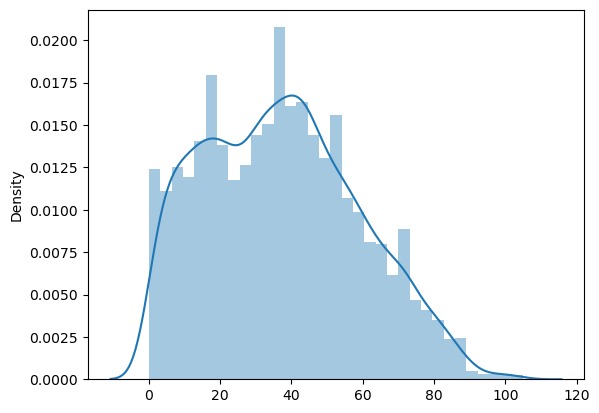

In [26]:
## We want to see the age distribution to decide which method to impute the missing value
sns.distplot(df, x = df['Age'])

<Axes: xlabel='Age'>

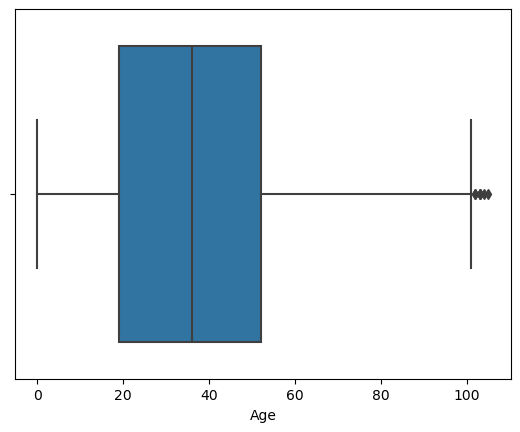

In [27]:
sns.boxplot(data = df, x = 'Age')

In [28]:
## Looks like the age distribution is skewed (asymetrical)
## From the boxplot, there are some outliers
## It's better to use median to impute the missing value
df['Age'].median()

36.0

In [29]:
df.loc[1757,['Age']] = [36]

`Religion`

In [30]:
df['Religion'].unique()

array(['Catholic', 'None', 'Muslim', 'Methodist', 'Christian', nan,
       'Sikh', 'Jewish', 'Orthodoxy', 'Pagan', 'Private', 'Undecided',
       'Sith', 'Jedi', 'Buddist', 'Baptist', 'Hindu', 'Quaker', ' '],
      dtype=object)

In [31]:
## We want to check some respondents who didn't mention their religion
df[df['Religion']=='None'] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,2,Davies Trafficway,Ashleigh,Smith,42,Head,Single,Female,Unemployed,None,None
3,4,Davies Trafficway,Carly,Johnson,26,Head,Single,Female,Unemployed,None,None
5,6,Davies Trafficway,Dean,Harvey,22,Head,Married,Male,University Student,None,None
6,6,Davies Trafficway,Samantha,Harvey,19,Wife,Married,Female,University Student,None,None
14,4,Bibi Manors,Ryan,Jennings,54,Partner,Single,Male,Commercial/residential surveyor,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8273,1,Ahmed Windmill,Leonard,Stephenson,61,Lodger,Single,Male,Ambulance person,None,None
8275,1,Ahmed Windmill,Tracy,Brooks,46,Lodger,Single,Female,Production manager,None,None
8277,1,Nelson Farm,Linda,Fisher,54,Wife,Married,Female,"Scientist, water quality",None,None
8283,1,Farrell Villa,Tina,Taylor,32,Daughter,Single,Female,Press sub,None,None


In [32]:
df[df['Religion']=='Jedi'] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6338,40,Bradley Vista,Natasha,Barrett,44,Head,Married,Female,Physiological scientist,None,Jedi


In [33]:
df[df['Religion']=='Private'] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4113,7,Fitzgerald Neck,Ricky,Rees-French,43,Head,Married,Male,Unemployed,None,Private
4114,7,Fitzgerald Neck,Marie,Rees-French,41,Wife,Married,Female,Systems developer,None,Private


In [34]:
df[df['Religion']=='Sith']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6209,6,Bradley Vista,Amelia,Rose,29,Head,Married,Female,"Teacher, early years/pre",None,Sith


In [35]:
df[df['Religion']=='Undecided'] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5969,37,Griffiths Dale,Billy,Barrett,32,Head,Single,Male,Statistician,None,Undecided
5970,37,Griffiths Dale,Anne,North,29,Partner,Single,Female,Unemployed,None,Undecided


In [36]:
df[df['Religion']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7847,192,Grace Lane,Connor,Brown,61,Husband,Married,Male,"Therapist, occupational",None,


In [37]:
df[df['Religion']=='Undecided'] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5969,37,Griffiths Dale,Billy,Barrett,32,Head,Single,Male,Statistician,None,Undecided
5970,37,Griffiths Dale,Anne,North,29,Partner,Single,Female,Unemployed,None,Undecided


In [38]:
df[df['Religion'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10,2,Bibi Manors,Edward,Smith,10,Son,NaN,Male,Student,None,NaN
15,4,Bibi Manors,Rebecca,Moore,16,Daughter,NaN,Female,Student,None,NaN
16,4,Bibi Manors,Raymond,Moore,16,Son,NaN,Male,Student,None,NaN
17,4,Bibi Manors,Stanley,Edwards-Moore,13,Son,NaN,Male,Student,None,NaN
20,5,Bibi Manors,Philip,Smith,11,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8289,1,Charity Rectory,Jill,Begum,2,Daughter,NaN,Female,Child,None,NaN
8290,1,Charity Rectory,Suzanne,Begum,0,Daughter,NaN,Female,Child,None,NaN
8293,1,Aries Cottage,Terence,Morris,13,Son,NaN,Male,Student,None,NaN
8294,1,Aries Cottage,Kenneth,Morris,10,Son,NaN,Male,Student,None,NaN


In [39]:
## Some respondents didn't want to answered
## Based on Office National Statistics, question about religion is voluntary
## We want to re-categorize some values with 'Not Answered' for respondents who didn't answer
## And 'No Religion' for respondents who answered as 'None'
## Based on Office for National Statistics - Census 2021

In [40]:
df.loc[df['Religion'] == 'Jedi', 'Religion'] ='Not Answered'
df.loc[df['Religion'] == 'Private', 'Religion'] ='Not Answered'
df.loc[df['Religion'] == 'Undecided', 'Religion'] ='Not Answered'
df.loc[df['Religion'] == 'Sith', 'Religion'] ='Not Answered'
df.loc[df['Religion'] == 'None', 'Religion'] ='No Religion'

In [41]:
## There's only one person who answered ' '
df[(df['Street'] == 'Grace Lane')&(df['House Number'] == 192)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7846,192,Grace Lane,Leanne,Brown,57,Head,Married,Female,Music therapist,None,Christian
7847,192,Grace Lane,Connor,Brown,61,Husband,Married,Male,"Therapist, occupational",None,


In [42]:
## We changed the participant's religion based on their head of the family
## Assume there was an error when input the data
df.loc[df['Religion'] == ' ', 'Religion'] ='Christian'

In [43]:
## A minor means that a person who is under the age of eighteen
## We should check that minors generally don't have a religion
## Set as undeclared

In [44]:
df[df['Age'] < 18]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10,2,Bibi Manors,Edward,Smith,10,Son,NaN,Male,Student,None,NaN
15,4,Bibi Manors,Rebecca,Moore,16,Daughter,NaN,Female,Student,None,NaN
16,4,Bibi Manors,Raymond,Moore,16,Son,NaN,Male,Student,None,NaN
17,4,Bibi Manors,Stanley,Edwards-Moore,13,Son,NaN,Male,Student,None,NaN
20,5,Bibi Manors,Philip,Smith,11,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8289,1,Charity Rectory,Jill,Begum,2,Daughter,NaN,Female,Child,None,NaN
8290,1,Charity Rectory,Suzanne,Begum,0,Daughter,NaN,Female,Child,None,NaN
8293,1,Aries Cottage,Terence,Morris,13,Son,NaN,Male,Student,None,NaN
8294,1,Aries Cottage,Kenneth,Morris,10,Son,NaN,Male,Student,None,NaN


In [45]:
df.loc[df['Age'] < 18, "Religion"] = "Undeclared"

In [46]:
## We need to handle some Missing Value in religion column

In [47]:
df[df['Religion'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
347,4,Lichfield Hill,Jay,Potter,18,Head,Married,Male,Student,None,NaN
348,4,Lichfield Hill,Amber,Potter,19,Wife,Married,Female,Photographer,None,NaN
995,9,Holyrood Avenue,Georgia,Robson,18,Lodger,Divorced,Female,Student,None,NaN
1206,24,Gray Mount,Martyn,Jones,18,Head,Married,Male,Student,None,NaN
1606,26,Ripon Pass,Yvonne,Davies,18,Visitor,Single,Female,Student,None,NaN
1767,49,Black Cape,Guy,Wood,18,Head,Married,Male,Student,None,NaN
1768,49,Black Cape,Amy,Wood,19,Wife,Married,Female,University Student,None,NaN
1954,34,Hill Points,Paula,Bentley,18,Head,Single,Female,Student,None,NaN
1998,45,Hill Points,Cameron,Robertson,18,None,Single,Male,Student,None,NaN
2060,20,Ranger Hollow,Rhys,Graham,18,None,Single,Male,Student,None,NaN


In [48]:
## Based on Census 2021, we can impute it as 'Not Answered'
df['Religion'] = df['Religion'].fillna(value = 'Not Answered')

In [49]:
df['Religion'].unique()

array(['Catholic', 'No Religion', 'Muslim', 'Methodist', 'Christian',
       'Undeclared', 'Sikh', 'Not Answered', 'Jewish', 'Orthodoxy',
       'Pagan', 'Buddist', 'Baptist', 'Hindu', 'Quaker'], dtype=object)

In [50]:
## We don't need to merge some Christianity religion
## Because we want to know the demand of the religious building

`Marital Status`

In [51]:
df['Marital Status'].unique()

array(['Divorced', 'Single', 'Widowed', 'Married', nan], dtype=object)

In [52]:
df[df['Marital Status'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10,2,Bibi Manors,Edward,Smith,10,Son,NaN,Male,Student,None,Undeclared
15,4,Bibi Manors,Rebecca,Moore,16,Daughter,NaN,Female,Student,None,Undeclared
16,4,Bibi Manors,Raymond,Moore,16,Son,NaN,Male,Student,None,Undeclared
17,4,Bibi Manors,Stanley,Edwards-Moore,13,Son,NaN,Male,Student,None,Undeclared
20,5,Bibi Manors,Philip,Smith,11,Son,NaN,Male,Student,None,Undeclared
...,...,...,...,...,...,...,...,...,...,...,...
8289,1,Charity Rectory,Jill,Begum,2,Daughter,NaN,Female,Child,None,Undeclared
8290,1,Charity Rectory,Suzanne,Begum,0,Daughter,NaN,Female,Child,None,Undeclared
8293,1,Aries Cottage,Terence,Morris,13,Son,NaN,Male,Student,None,Undeclared
8294,1,Aries Cottage,Kenneth,Morris,10,Son,NaN,Male,Student,None,Undeclared


In [53]:
## We want to check if there's a minor who already married
## Because it's illegal

In [54]:
df[(df['Age'] < 18)&(df['Marital Status'] == 'Married')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [55]:
df[(df['Age'] < 18)&(df['Marital Status'] == 'Divorced')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [56]:
df[(df['Age'] < 18)&(df['Marital Status'] == 'Widowed')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [57]:
df.loc[df['Age'] < 18, "Marital Status"] = "Single"

In [58]:
df['Marital Status'].unique()

array(['Divorced', 'Single', 'Widowed', 'Married'], dtype=object)

`Occupation`

In [59]:
df[df['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3635,143,ExcaliburBells Estate,Anthony,Miles,51,Cousin,Single,Male,,None,No Religion
5632,4,Dawson Motorway,Laura,Hunt,39,Wife,Married,Female,,None,No Religion
6945,10,Morris Ways,Owen,Fleming-Jenkins,10,Son,Single,Male,,None,Undeclared


In [60]:
## We want to check each respondents who didn't answer

In [61]:
df[(df['House Number'] == 10)&(df['Street'] == 'Morris Ways')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6943,10,Morris Ways,Nicola,Fleming,54,Head,Married,Female,Tree surgeon,None,Methodist
6944,10,Morris Ways,Liam,Fleming-Jenkins,58,Husband,Married,Male,Primary school teacher,None,Methodist
6945,10,Morris Ways,Owen,Fleming-Jenkins,10,Son,Single,Male,,None,Undeclared
6946,10,Morris Ways,Joan,Lyons-Fleming-Jenkins,9,Daughter,Single,Female,Student,None,Undeclared
6947,10,Morris Ways,Charlie,Lyons-Fleming-Jenkins,7,Son,Single,Male,Student,None,Undeclared
6948,10,Morris Ways,Howard,Lyons-Fleming-Jenkins,3,Son,Single,Male,Child,None,Undeclared


In [62]:
## Still 10 years old
## Supposed to be a student
df.loc[6945,['Occupation']] = ['Student']

In [63]:
df[(df['House Number'] == 143)&(df['Street'] == 'ExcaliburBells Estate')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3633,143,ExcaliburBells Estate,Gary,Clark,46,Head,Single,Male,Land,None,Methodist
3634,143,ExcaliburBells Estate,Jack,Clark,56,Cousin,Single,Male,Hydrologist,None,No Religion
3635,143,ExcaliburBells Estate,Anthony,Miles,51,Cousin,Single,Male,,None,No Religion


In [64]:
df.loc[3635,['Occupation']] = ['Unemployed']

In [65]:
df[(df['House Number'] == 4)&(df['Street'] == 'Dawson Motorway')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5631,4,Dawson Motorway,Derek,Hunt,44,Head,Married,Male,Fine artist,None,No Religion
5632,4,Dawson Motorway,Laura,Hunt,39,Wife,Married,Female,,None,No Religion
5633,4,Dawson Motorway,Denise,Clark,40,Lodger,Single,Female,Minerals surveyor,None,Catholic


In [66]:
df.loc[5632,['Occupation']] = ['Unemployed']

`Relationship to Head of House`

In [67]:
df['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Partner', 'Son', 'Husband', 'Daughter',
       'Grandson', 'None', 'Lodger', 'Visitor', 'Sibling', 'Cousin',
       'Granddaughter', 'Daughter-in-law', 'Step-Daughter', 'Step-Son',
       'Neice', 'Adopted Daughter', 'Nephew', 'Adopted Son',
       'Adopted Grandson', ' ', 'Son-in-law'], dtype=object)

In [68]:
df[df['Relationship to Head of House'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6744,21,Glorygain Crescent,Dale,Davies,25,,Single,Male,"Editor, magazine features",None,No Religion


In [69]:
df[(df['House Number'] == 21)&(df['Street'] == 'Glorygain Crescent')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6740,21,Glorygain Crescent,Hayley,Davies,64,Head,Single,Female,Unemployed,None,Methodist
6741,21,Glorygain Crescent,Adam,Davies,30,Son,Divorced,Male,Museum/gallery conservator,None,No Religion
6742,21,Glorygain Crescent,Alice,Davies,29,Daughter,Single,Female,Chartered legal executive (England and Wales),None,No Religion
6743,21,Glorygain Crescent,Marie,Davies,29,Daughter,Single,Female,Barrister,None,Methodist
6744,21,Glorygain Crescent,Dale,Davies,25,,Single,Male,"Editor, magazine features",None,No Religion


In [70]:
df.loc[6744,['Relationship to Head of House']] = ['Son']

In [71]:
## We want to check the relationship to head of house of minor respondents

In [72]:
df[(df['Age'] < 18)&(df['Relationship to Head of House'] == 'Head')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3801,195,ExcaliburBells Estate,Lindsey,Townsend,15,Head,Single,Female,Student,None,Undeclared


In [73]:
df[(df['Age'] < 18)&(df['Relationship to Head of House'] == 'Wife')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [74]:
df[(df['Age'] < 18)&(df['Relationship to Head of House'] == 'Partner')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [75]:
df[(df['Age'] < 18)&(df['Relationship to Head of House'] == 'Husband')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [76]:
## It shouldn't be happened
## We need to check
df[(df['Street'] == 'ExcaliburBells Estate')&(df['House Number'] == 195)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3801,195,ExcaliburBells Estate,Lindsey,Townsend,15,Head,Single,Female,Student,None,Undeclared
3802,195,ExcaliburBells Estate,Annette,Green,42,Lodger,Single,Female,Fast food restaurant manager,None,No Religion
3803,195,ExcaliburBells Estate,Kathryn,Parker,19,Lodger,Divorced,Female,University Student,None,No Religion


In [77]:
df.loc[3801,['Relationship to Head of House']] = ['Lodger']

`Infirmity`

In [78]:
df['Infirmity'].unique()

array(['None', 'Mental Disability', 'Blind', 'Physical Disability',
       'Disabled', ' ', 'Deaf', 'Unknown Infection'], dtype=object)

In [79]:
df[df['Infirmity'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
515,12,White Key,Leah,Fletcher,52,Head,Single,Female,"Librarian, public",,Catholic
2128,39,Ring Street,Joanne,Ross,18,Head,Single,Female,Student,,Not Answered
2933,11,Leicester Drive,Joe,Holland,48,Husband,Married,Male,"Scientist, audiological",,No Religion
3718,170,ExcaliburBells Estate,Keith,Lee,34,Husband,Married,Male,Unemployed,,No Religion
4476,26,Canary Road,Shirley,Smith,71,Head,Widowed,Female,Retired Translator,,No Religion
4527,46,Canary Road,Elizabeth,Griffiths-Freeman,50,Head,Divorced,Female,Unemployed,,No Religion
5251,17,Quayside Drive,Frank,Bennett,32,Son,Single,Male,Paramedic,,No Religion
6503,30,Lime Crescent,Clifford,Black,0,Nephew,Single,Male,Child,,Undeclared
7574,86,Grace Lane,Harriet,Davis,11,Daughter,Single,Female,Student,,Undeclared
7610,98,Grace Lane,Roy,Parkes,9,Son,Single,Male,Student,,Undeclared


In [80]:
df.loc[df['Infirmity'] == ' ', 'Infirmity'] ='None'

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8296 non-null   int64 
 1   Street                         8296 non-null   object
 2   First Name                     8296 non-null   object
 3   Surname                        8296 non-null   object
 4   Age                            8296 non-null   int64 
 5   Relationship to Head of House  8296 non-null   object
 6   Marital Status                 8296 non-null   object
 7   Gender                         8296 non-null   object
 8   Occupation                     8296 non-null   object
 9   Infirmity                      8296 non-null   object
 10  Religion                       8296 non-null   object
dtypes: int64(2), object(9)
memory usage: 713.1+ KB


# Early Analysis

After cleaning the datasets, we want to make a pyramid age distribution.

In [82]:
def age_group(x):
    if x < 6:
        return '0 - 5'
    elif x >= 6 and x < 11:
        return '6 - 10'
    elif x >= 11 and x < 16:
        return '11 - 15'
    elif x >= 16 and x < 21:
        return '16 - 20'
    elif x >= 21 and x < 26:
        return '21 - 25'
    elif x >= 26 and x < 31:
        return '26 - 30'
    elif x >= 31 and x < 36:
        return '31 - 35'
    elif x >= 36 and x < 41:
        return '36 - 40'
    elif x >= 41 and x < 46:
        return '41 - 45'
    elif x >= 46 and x < 51:
        return '46 - 50'
    elif x >= 51 and x < 56:
        return '51 - 55'
    elif x >= 56 and x < 61:
        return '56 - 60'
    elif x >= 61 and x < 66:
        return '61 - 65'
    elif x >= 66 and x < 71:
        return '66 - 70'
    elif x >= 71 and x < 76:
        return '71 - 75'
    elif x >= 76 and x < 81:
        return '76 - 80'
    elif x >= 81 and x < 86:
        return '81 - 85'
    elif x >= 86 and x < 91:
        return '86 - 90'
    elif x >= 91 and x < 96:
        return '91 - 95'
    elif x >= 96:
        return '95+'

In [83]:
male_df = df[df['Gender'] == 'Male']

In [84]:
female_df = df[df['Gender'] == 'Female']

In [85]:
male_df['Age'] = male_df['Age'].apply(age_group)

C:\Users\bares\AppData\Local\Temp\ipykernel_32048\2883305811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df['Age'] = male_df['Age'].apply(age_group)


In [86]:
female_df['Age'] = female_df['Age'].apply(age_group)

C:\Users\bares\AppData\Local\Temp\ipykernel_32048\3455773506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['Age'] = female_df['Age'].apply(age_group)


In [87]:
male_df.Age.value_counts()

41 - 45    343
36 - 40    304
21 - 25    295
31 - 35    290
0 - 5      290
11 - 15    285
6 - 10     279
16 - 20    267
26 - 30    262
46 - 50    256
51 - 55    243
56 - 60    225
61 - 65    162
66 - 70    129
71 - 75    121
76 - 80     85
81 - 85     54
86 - 90     41
95+         11
91 - 95      8
Name: Age, dtype: int64

In [88]:
female_df.Age.value_counts()

36 - 40    396
41 - 45    374
31 - 35    366
46 - 50    331
26 - 30    321
16 - 20    314
11 - 15    282
21 - 25    273
51 - 55    269
6 - 10     264
0 - 5      236
56 - 60    216
61 - 65    183
66 - 70    173
71 - 75    137
76 - 80     89
81 - 85     74
86 - 90     29
95+         12
91 - 95      7
Name: Age, dtype: int64

In [89]:
age_p = pd.DataFrame({'Age': ['95+', '91 - 95', '86 - 90', '81 - 85', '76 - 80',
                              '71 - 75', '66 - 70', '61 - 65', '56 - 60', '51 - 55',
                              '46 - 50', '41 - 45', '36 - 40', '31 - 35', '26 - 30',
                              '21 - 25','16 - 20', '11 - 15', '6 - 10', '0 - 5'],
                      'Male': [-11, -8, -41, -54, -85, 
                               -121, -129, -162, -225,-243,
                               -256, -343, -304, -290, -262,
                               -295, -267,-285, -279, -290],
                      'Female': [12, 7, 29, 74, 89,
                                 137, 173, 183, 216, 269,
                                331, 374, 396, 366, 321,
                                 273, 314, 282, 264, 236]})

AgeClass = ['95+', '91 - 95', '86 - 90', '81 - 85', '76 - 80',
                              '71 - 75', '66 - 70', '61 - 65', '56 - 60', '51 - 55', '46 - 50', 
                             '41 - 45', '36 - 40', '31 - 35', '26 - 30', '21 - 25',
                              '16 - 20', '11 - 15', '6 - 10', '0 - 5']

In [90]:
age_p

,Age,Male,Female
0,95+,-11,12
1,91 - 95,-8,7
2,86 - 90,-41,29
3,81 - 85,-54,74
4,76 - 80,-85,89
5,71 - 75,-121,137
6,66 - 70,-129,173
7,61 - 65,-162,183
8,56 - 60,-225,216
9,51 - 55,-243,269


Text(0.5, 1.0, 'Age Pyramid')

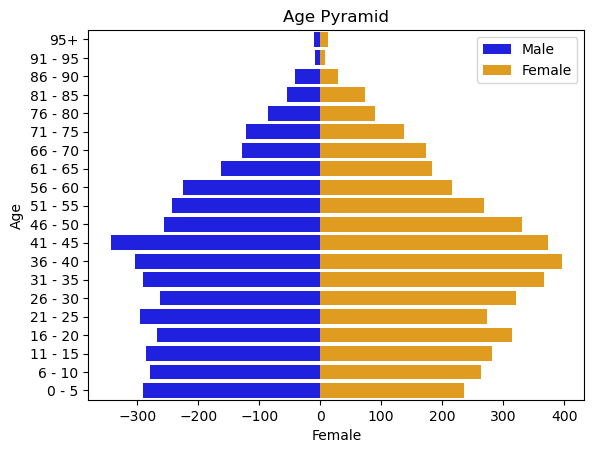

In [91]:
age_pyramid = sns.barplot(x='Male', y='Age', data=age_p, order=AgeClass, color=('blue'), label='Male')
age_pyramid = sns.barplot(x='Female', y='Age', data=age_p, order=AgeClass, color=('orange'), label='Female')
age_pyramid.legend()
plt.title('Age Pyramid')

In [92]:
## There are more middle-aged people than young people

In [93]:
age_band = df['Age'].apply(age_group)

In [94]:
df.loc[:, "age_band"] = age_band

In [95]:
whole_population = df['Age'].count()
whole_population

8296

In [96]:
df['Religion'].value_counts()

No Religion     2830
Undeclared      1870
Christian       1835
Catholic         932
Methodist        574
Muslim           115
Not Answered      49
Sikh              42
Jewish            41
Orthodoxy          2
Pagan              2
Buddist            1
Baptist            1
Hindu              1
Quaker             1
Name: Religion, dtype: int64

In [97]:
df['Marital Status'].value_counts()

Single      4639
Married     2536
Divorced     747
Widowed      374
Name: Marital Status, dtype: int64

In [98]:
df['Infirmity'].value_counts()

None                   8236
Mental Disability        14
Physical Disability      12
Disabled                 10
Unknown Infection        10
Deaf                      8
Blind                     6
Name: Infirmity, dtype: int64

In [99]:
## Making a new age-band column
age_band = df['Age'].apply(age_group)
df.loc[:, "age_band"] = age_band

In [100]:
## Making an occupancy level column
## To check how many person per household
occupancy_level = df.groupby(['House Number', 'Street']).size().reset_index(name='Person per Household')

In [101]:
df = pd.merge(df, occupancy_level, on = ['House Number', 'Street'])

In [102]:
## Simplify the occupations
def cat_occupation(Occupation, Age):
    if 'Unemployed' in Occupation and Age >= 65:
        status = 'Retired'
    elif 'Retired' in Occupation:
        status = 'Retired'
    elif 'Emeritus' in Occupation:
        status = 'Retired'
    elif 'Unemployed' in Occupation and Age < 65:
        status = 'Unemployed'
    elif ('Student' in Occupation) or ('Child' in Occupation):
        status = 'Student'
    else:
        status = 'Employed'
    
    return status

In [103]:
df['occupation_category'] = df.apply(lambda row: cat_occupation(row['Occupation'], row['Age']), axis=1)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8296 entries, 0 to 8295
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8296 non-null   int64 
 1   Street                         8296 non-null   object
 2   First Name                     8296 non-null   object
 3   Surname                        8296 non-null   object
 4   Age                            8296 non-null   int64 
 5   Relationship to Head of House  8296 non-null   object
 6   Marital Status                 8296 non-null   object
 7   Gender                         8296 non-null   object
 8   Occupation                     8296 non-null   object
 9   Infirmity                      8296 non-null   object
 10  Religion                       8296 non-null   object
 11  age_band                       8296 non-null   object
 12  Person per Household           8296 non-null   int64 
 13  occ

In [105]:
df.describe()

,House Number,Age,Person per Household
count,8296.000000,8296.000000,8296.000000
mean,42.652001,37.117165,3.348843
std,52.270547,21.791267,1.662132
min,1.000000,0.000000,1.000000
25%,10.000000,19.000000,2.000000
50%,23.000000,36.000000,3.000000
75%,46.000000,52.000000,4.000000
max,245.000000,105.000000,13.000000


## Detailed Analysis

#### Religion and Infirmity

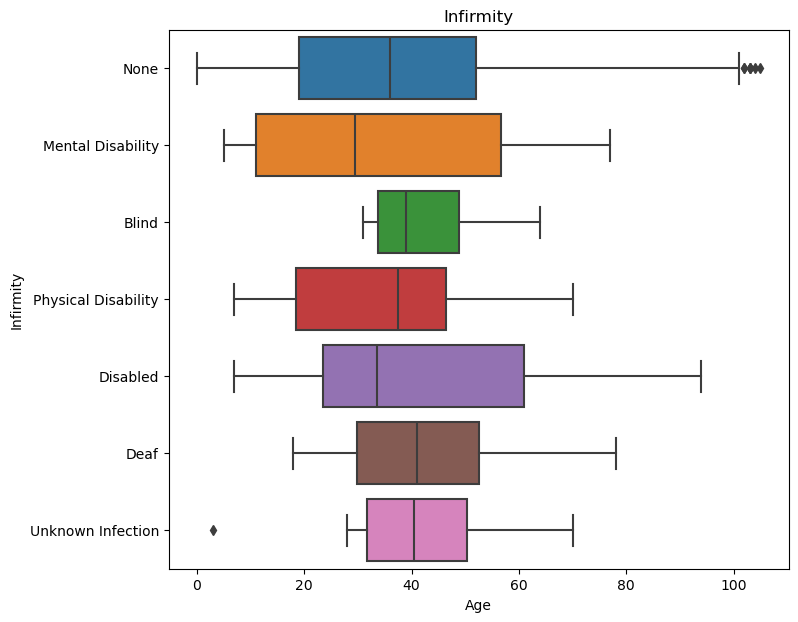

In [106]:
plt.figure(figsize=(8,7))
sns.boxplot(x = 'Age', y = 'Infirmity', data=df)
plt.title("Infirmity")
plt.show()

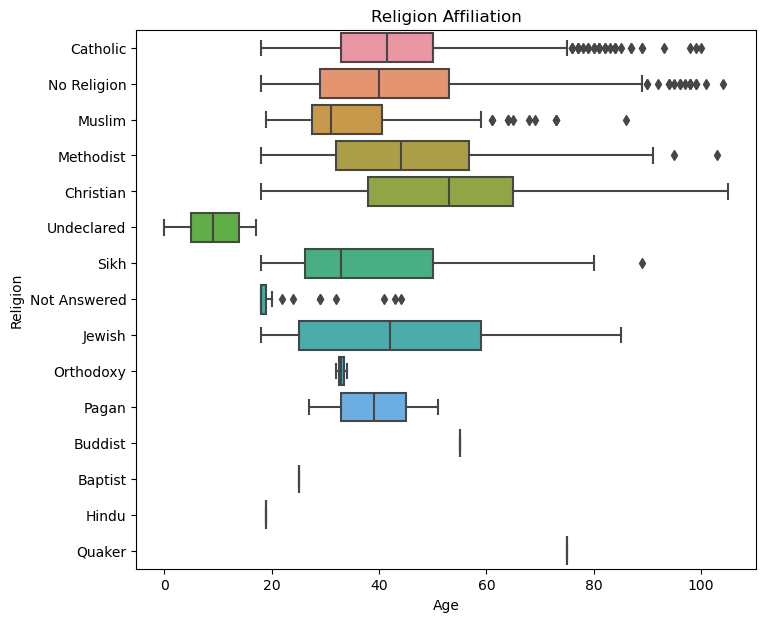

In [107]:
plt.figure(figsize=(8,7))
sns.boxplot(x = 'Age', y = 'Religion', data=df)
plt.title("Religion Affiliation")
plt.show()

In [108]:
df[['Religion', 'Age']].groupby('Religion').mean().round(0)

,Age
Religion,
Baptist,25.0
Buddist,55.0
Catholic,43.0
Christian,52.0
Hindu,19.0
Jewish,44.0
Methodist,45.0
Muslim,36.0
No Religion,43.0


### Marriage and Divorce

In [109]:
df[(df['Gender'] == 'Female')&(df['Marital Status'] == 'Divorced')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_band,Person per Household,occupation_category
0,1,Davies Trafficway,Paula,Houghton,42,Head,Divorced,Female,Analytical chemist,None,Catholic,41 - 45,1,Employed
4,5,Davies Trafficway,Lauren,Jenkins,32,Head,Divorced,Female,General practice doctor,None,Muslim,31 - 35,1,Employed
27,8,Bibi Manors,Dorothy,Lowe,69,Head,Divorced,Female,Retired Special effects artist,None,Christian,66 - 70,1,Retired
31,9,Bibi Manors,Teresa,Smith,24,Daughter,Divorced,Female,Financial trader,None,No Religion,21 - 25,5,Employed
99,9,Williams Centers,Christine,Jackson,41,Daughter,Divorced,Female,Sub,None,No Religion,41 - 45,5,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,1,Clark Warehouse,Sarah,Brooks,39,Visitor,Divorced,Female,"Designer, television/film set",None,Methodist,36 - 40,6,Employed
8248,1,Patel Citadel,Sandra,Myers,67,Head,Divorced,Female,Control and instrumentation engineer,None,Christian,66 - 70,1,Employed
8263,1,Ahmed Windmill,Paige,Hill,47,Head,Divorced,Female,Unemployed,None,No Religion,46 - 50,13,Unemployed
8271,1,Ahmed Windmill,Melissa,King,27,Lodger,Divorced,Female,"Buyer, industrial",None,No Religion,26 - 30,13,Employed


In [110]:
marriage = (df['Marital Status'] == 'Married').sum() / 2
marriage

1268.0

In [111]:
divorce = (df['Marital Status'] == 'Divorced').sum() / 2
divorce

373.5

In [112]:
widow = (df['Marital Status'] == 'Widowed').sum()
widow

374

In [113]:
total_marriage = marriage + divorce + widow
total_marriage

2015.5

In [114]:
divorce_to_marriage = 471 / total_marriage
print("%.2f" % divorce_to_marriage)

0.23


### Birth and Death Rate

In [115]:
newborn_baby = (df['Age'] == 0).sum()
newborn_baby

75

In [116]:
crude_birth_rate = ((newborn_baby / whole_population) * 1000).round(2)
crude_birth_rate

9.04

In [145]:
newborn_baby_5 = (df['Age'] == 5).sum()
newborn_baby_5

107

In [146]:
crude_birth_rate_5 = ((newborn_baby_5 / whole_population) * 1000).round(2)
crude_birth_rate_5

12.9

In [117]:
death_diff = []

for i in range(66,97,5):
    first_group = (df[(df['Age']>=i) & (df['Age']<=(i+4))]).shape[0]
    second_group = (df[(df['Age']>=i+5) & (df['Age']<=(i+9))]).shape[0]
    death_diff.append(((first_group)-(second_group))/5)

In [118]:
sum_death = sum(death_diff)
sum_death

58.2

In [119]:
# total_dead = len(df[(df['Age']>=66) & (df['Age']<=105)])
# total_dead

970

In [137]:
death_rate = ((sum_death / whole_population) * 1000)
death_rate

7.01542912246866

### Occupancy Level

In [150]:
df['Person per Household'].value_counts()

3     1962
2     1900
4     1660
5     1430
1      880
6      264
7       77
8       32
10      30
13      26
12      24
11      11
Name: Person per Household, dtype: int64

C:\Users\bares\AppData\Local\Temp\ipykernel_32048\3327651329.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y = df['age_band'], x = (df['Relationship to Head of House'] == 'Lodger'), ci = None)


<Axes: xlabel='Relationship to Head of House', ylabel='age_band'>

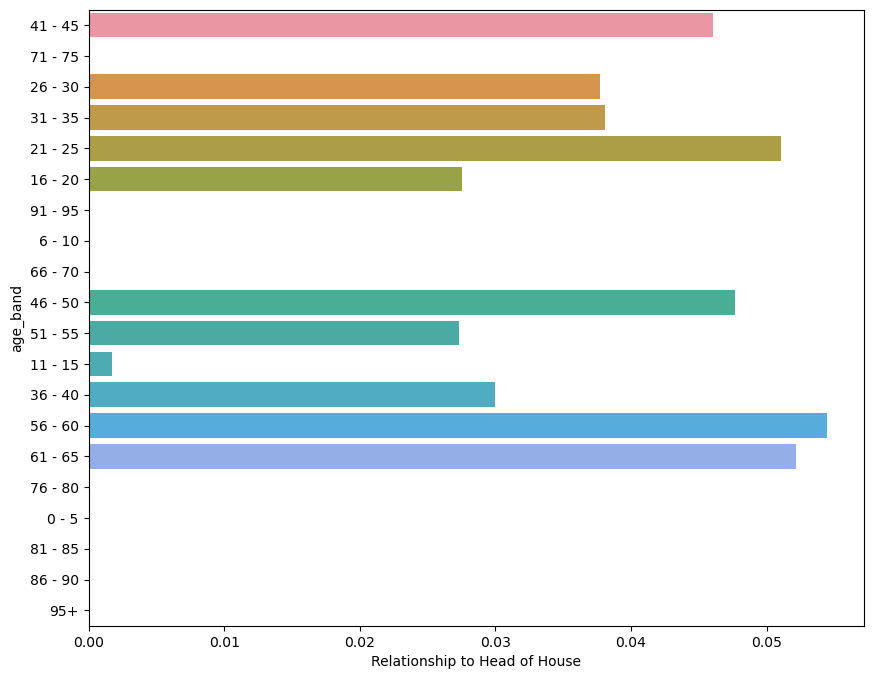

In [141]:
plt.figure(figsize=(10, 8))
sns.barplot(y = df['age_band'], x = (df['Relationship to Head of House'] == 'Lodger'), ci = None)

In [ ]:
## Lodger mostly from the middle aged
## The demand for the low-density housing are high

### Migration

In [125]:
df['Relationship to Head of House'].value_counts()

Head                3251
Son                 1265
Daughter            1231
Husband              937
None                 496
Wife                 324
Partner              242
Lodger               231
Grandson              90
Granddaughter         74
Cousin                30
Sibling               25
Visitor               24
Adopted Daughter      16
Nephew                16
Neice                 11
Step-Daughter         10
Adopted Son           10
Step-Son               9
Daughter-in-law        2
Adopted Grandson       1
Son-in-law             1
Name: Relationship to Head of House, dtype: int64

In [ ]:
## There are 24 visitors
## There are 231 lodgers

In [142]:
uni_student_total = (df['Occupation'] == 'University Student').sum()
uni_student_total

464

C:\Users\bares\AppData\Local\Temp\ipykernel_32048\1269943871.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y = df['age_band'], x = (df['Occupation'] == 'University Student'), ci = None)


<Axes: xlabel='Occupation', ylabel='age_band'>

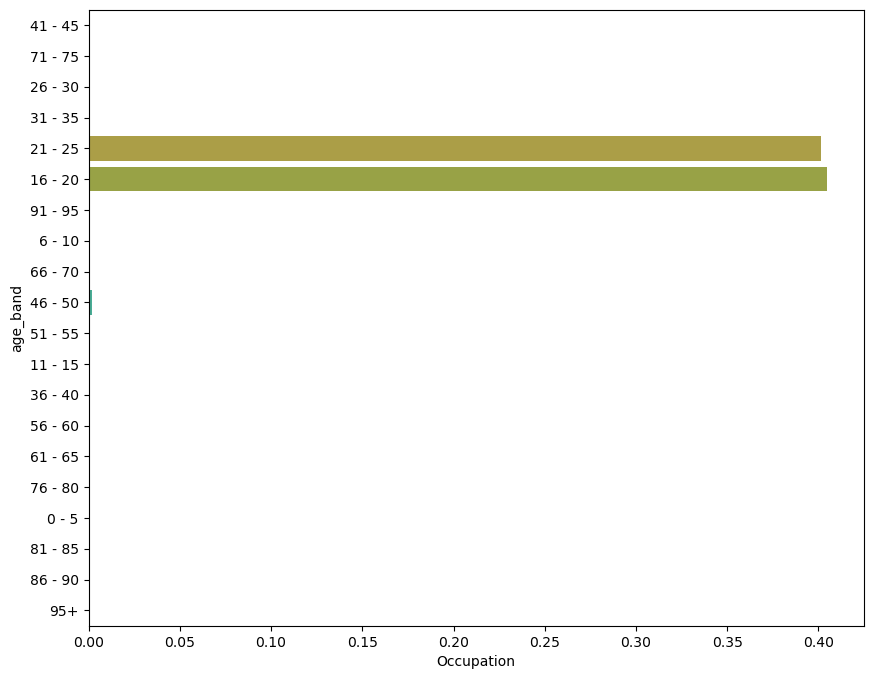

In [147]:
plt.figure(figsize=(10, 8))
sns.barplot(y = df['age_band'], x = (df['Occupation'] == 'University Student'), ci = None)

## Employment and Commuters

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8296 entries, 0 to 8295
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8296 non-null   int64 
 1   Street                         8296 non-null   object
 2   First Name                     8296 non-null   object
 3   Surname                        8296 non-null   object
 4   Age                            8296 non-null   int64 
 5   Relationship to Head of House  8296 non-null   object
 6   Marital Status                 8296 non-null   object
 7   Gender                         8296 non-null   object
 8   Occupation                     8296 non-null   object
 9   Infirmity                      8296 non-null   object
 10  Religion                       8296 non-null   object
 11  age_band                       8296 non-null   object
 12  Person per Household           8296 non-null   int64 
 13  occ

In [135]:
unemployed = (df['occupation_category'] == 'Unemployed').sum()
unemployed

499

In [133]:
labor_force = ((df['occupation_category'] == 'Unemployed').sum()) + ((df['occupation_category'] == 'Employed').sum())
labor_force

4999

In [138]:
unemployement_rate = ((unemployed / labor_force) * 100).round(2)
unemployement_rate

9.98

In [139]:
employed = (df['occupation_category'] == 'Employed').sum()
employed

4500

In [140]:
employement_rate = ((employed / labor_force) * 100).round(2)
employement_rate

90.02